### QISkit Example 05: Selecting a Backend
* Qconfig.py
* Set up the API token
* Know the available backends
* Execute a job using IBM cloud hosted simulator

In [1]:
# Creating quantum circuits
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit import execute
from qiskit.tools.visualization import circuit_drawer, plot_histogram

qr =  QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

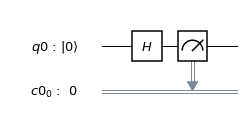

In [2]:
# Apply a single H gate
qc.h(qr)
qc.measure(qr, cr)
circuit_drawer(qc)

In [3]:
import os
from qiskit import Aer

# Print the local simulator backends
print("Local simulator backends: ")
Aer.backends()

Local simulator backends: 


[<QasmSimulator('qasm_simulator') from Aer()>,
 <QasmSimulatorPy('qasm_simulator_py') from Aer()>,
 <StatevectorSimulator('statevector_simulator') from Aer()>,
 <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>,
 <UnitarySimulator('unitary_simulator') from Aer()>,
 <CliffordSimulator('clifford_simulator') from Aer()>]

In [4]:
from qiskit import IBMQ

# Save your credeintials on disk. Need to be done only once. 
IBMQ.save_account(os.getenv('QX_API_TOKEN'))
#IBMQ.save_account("PUT_YOUR_API_TOKEN_HERE") 

# Alternatively, you can only "enable" the credentials, for this session only:
# IBMQ.enable_account("PUT_YOUR_API_TOKEN_HERE")

IBMQ.load_accounts()

print("Available online backends: ")
IBMQ.backends()

/home/nsathaye/anaconda3.6/lib/python3.6/site-packages/qiskit/backends/ibmq/ibmqprovider.py:141: UserWarning: Credentials are already stored.
  warnings.warn('Credentials are already stored.')
Automatic discovery of qconfig credentials failed: 'Error loading Qconfig.py: Please set up a valid API access token. See Qconfig.py.'


Available online backends: 


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

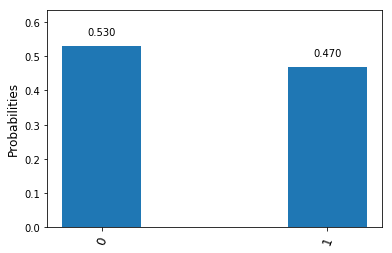

{'0': 53, '1': 47}


In [5]:
# Run the circuit using local simulator 
local_simulator = Aer.get_backend("qasm_simulator")
job = execute(qc, backend=local_simulator, shots=100)

result = job.result()
counts = result.get_counts()
plot_histogram(counts)
print(counts)

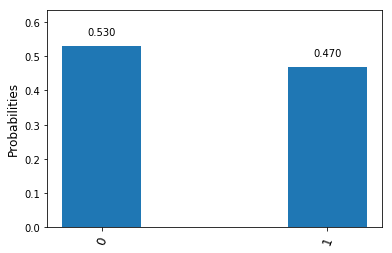

{'0': 53, '1': 47}


In [6]:
# Run the circuit using the cloud simulator
online_simulator = IBMQ.get_backend("ibmq_qasm_simulator")
job = execute(qc, backend=online_simulator)

result_cloud = job.result()
counts = result.get_counts()
plot_histogram(counts)
print(counts)